In [3]:
#IMPORTING LIBRARIES

In [3]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

In [4]:
#PROCESSING DATA INTO PANDAS

In [5]:
heart_data=pd.read_csv('heart_disease_data.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#first 5 rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#last 5 rows
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
heart_data.shape

(303, 14)

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#checking numm values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#stats of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#checking target value 
heart_data['target'].value_counts()
# --> 1=defective heart
# --> 0=healthy heart

target
1    165
0    138
Name: count, dtype: int64

In [13]:
#spliting target and features into x and y
x = heart_data.drop(columns='target',axis=1)
y = heart_data['target']

In [14]:
#spliting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [15]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [16]:
#training a model
model =LogisticRegression()

In [17]:
model.fit(x_train,y_train)

C:\Users\MUHAMMAD SUBHAN KHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
#accuracy score on trained data
x_train_prediction =model.predict(x_train)
x_train_accuracy = accuracy_score(x_train_prediction,y_train)

In [19]:
print('Accuracy on trained data: ', x_train_accuracy)

Accuracy on trained data:  0.8512396694214877


In [20]:
x_test_prediction =model.predict(x_test)
x_test_accuracy = accuracy_score(x_test_prediction,y_test)

In [21]:
print('Accuracy on test data: ', x_test_accuracy)

Accuracy on test data:  0.819672131147541


<Figure size 1500x800 with 0 Axes>

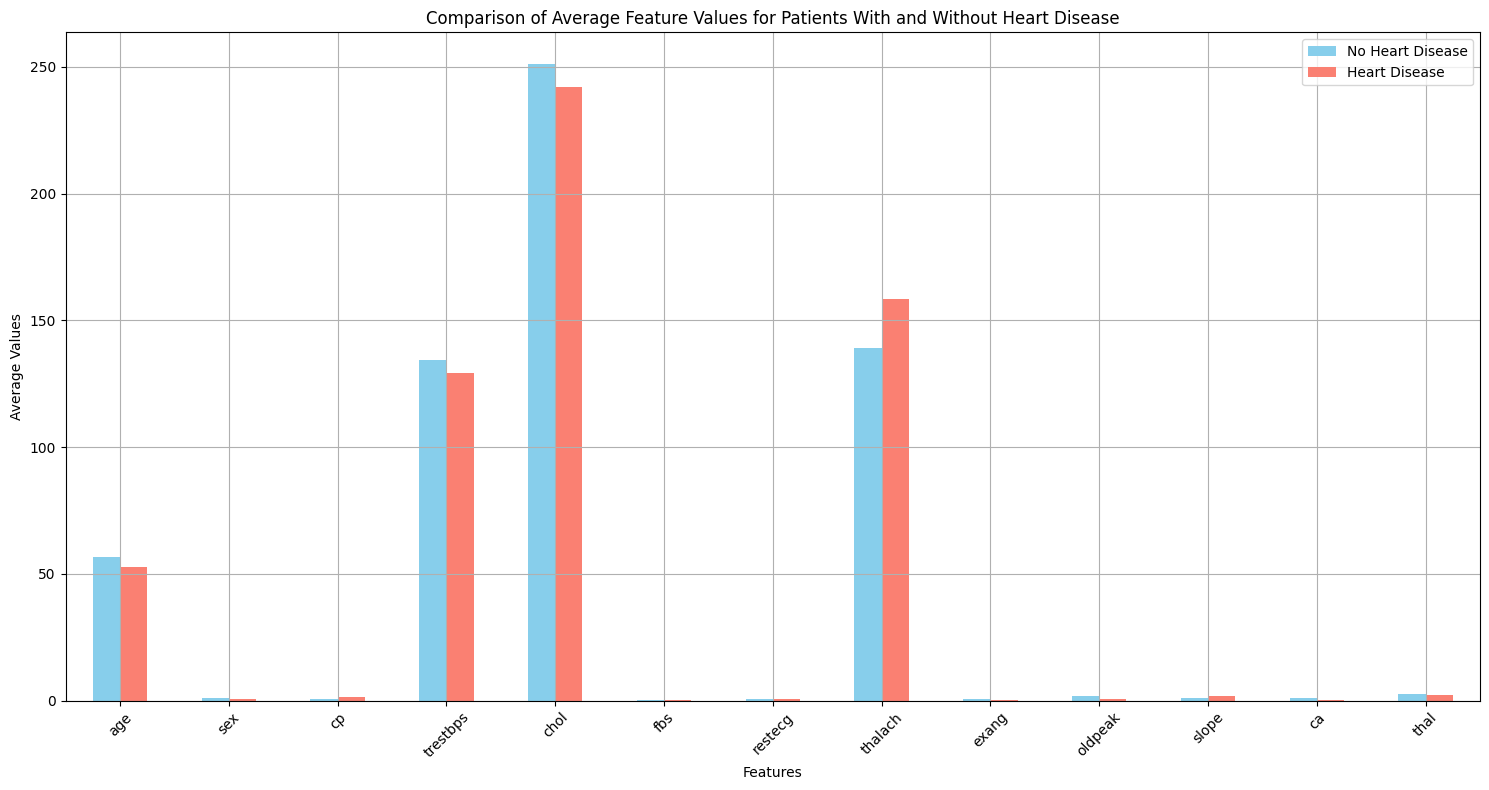

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by the target and calculate mean for all features
average_values = heart_data.groupby('target').mean()

# Create a bar plot for each feature
plt.figure(figsize=(15, 8))
average_values.T.plot(kind='bar', figsize=(15, 8), color=['skyblue', 'salmon'])

# Add labels and title
plt.title('Comparison of Average Feature Values for Patients With and Without Heart Disease')
plt.xlabel('Features')
plt.ylabel('Average Values')
plt.xticks(rotation=45)  # Rotate feature names to keep them readable
plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper right')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [33]:
import numpy as np

def predict_heart_disease(input_features):
    """
    Predicts if the patient has heart disease based on input features.
    
    Parameters:
    input_features (tuple): A tuple containing the patient's health metrics.
    
    Returns:
    None: Prints the prediction result.
    """
    # Convert the input features to a numpy array and reshape for the model
    input_array = np.asarray(input_features).reshape(1, -1)

    # Make the prediction using the trained model
    prediction = model.predict(input_array)

    # Interpret the prediction
    if prediction[0] == 0:
        result = 'Heart of the patient is okay.'
    else:
        result = 'The person has heart disease.'
    
    return result

# Example input features (update these values based on your data)
# Features: 
# (age,                   # Age of the patient
#  sex,                   # Sex (1 = male; 0 = female)
#  cp,                    # Chest Pain Type (0-3)
#  trestbps,              # Resting Blood Pressure (in mm Hg)
#  chol,                  # Serum Cholesterol (in mg/dl)
#  fbs,                   # Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)
#  restecg,               # Resting Electrocardiographic Results (0-2)
#  thalach,               # Maximum Heart Rate Achieved
#  exang,                 # Exercise Induced Angina (1 = yes; 0 = no)
#  oldpeak,               # ST Depression Induced by Exercise Relative to Rest
#  slope,                 # Slope of the Peak Exercise ST Segment (0-2)
#  ca,                    # Number of Major Vessels (0-3) Colored by Fluoroscopy
#  thal)                  # Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)
patient_input = (55, 1, 0, 140, 217, 0, 1, 111, 1, 5.6, 0, 0, 3)

# Call the function and print the result
prediction_result = predict_heart_disease(patient_input)
print(prediction_result)



Heart of the patient is okay.


C:\Users\MUHAMMAD SUBHAN KHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
